In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('final dataset.csv')

In [29]:
data.head(50)

,Density,Turbidity,R,G,B,Degradation level
0,1.01,458.12,198,223,188,0.01
1,1.02,458.12,195,222,185,0.01
2,1.01,459.37,198,225,182,0.01
3,1.02,458.12,197,221,186,0.01
4,1.01,458.36,195,228,186,0.01
5,1.03,469.25,195,221,187,0.01
6,1.02,466.23,194,226,190,0.01
7,1.03,458.12,197,221,187,0.01
8,1.02,446.95,190,202,170,0.05
9,1.02,446.95,188,206,168,0.05


In [4]:
data.shape

(157, 6)

In [5]:
data.isnull().sum() #no null values

Density              0
Turbidity            0
R                    0
G                    0
B                    0
Degradation level    0
dtype: int64

In [6]:
data.info() #every column is clear

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Density            157 non-null    float64
 1   Turbidity          157 non-null    float64
 2   R                  157 non-null    int64  
 3   G                  157 non-null    int64  
 4   B                  157 non-null    int64  
 5   Degradation level  157 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 7.5 KB


In [7]:
# Total columns
data.columns    

Index(['Density', 'Turbidity', 'R', 'G', 'B', 'Degradation level'], dtype='object')

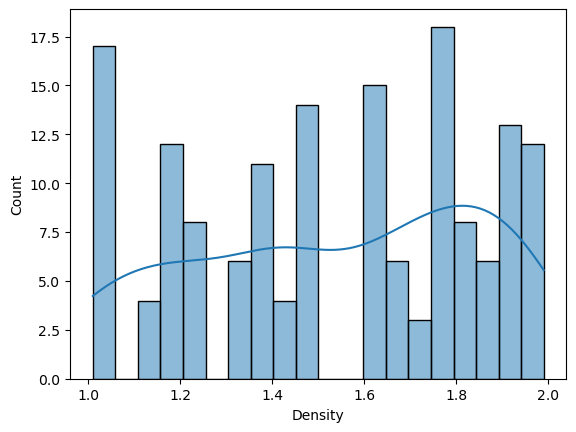

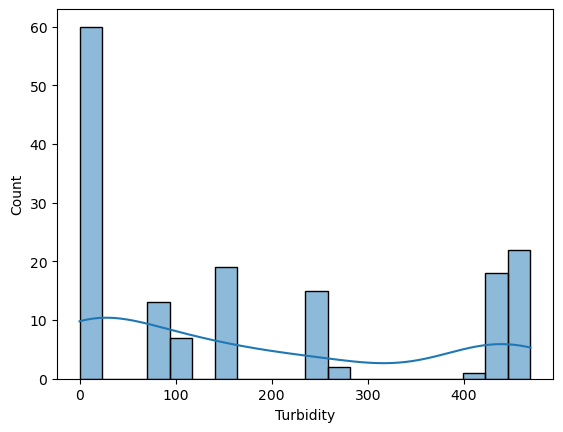

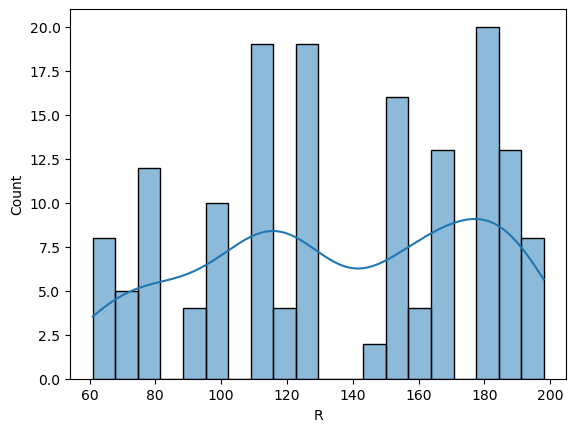

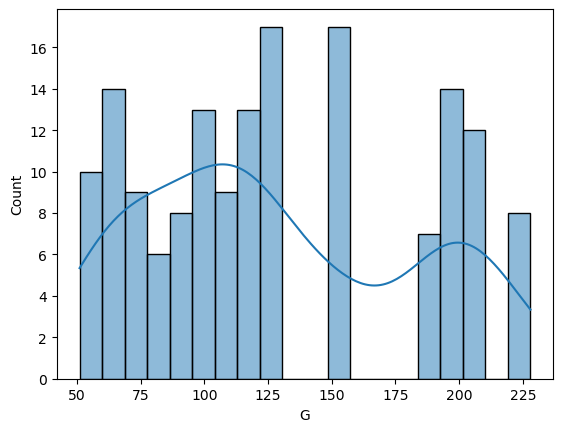

In [8]:
#check the distributions of data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for column in data.columns[:4]:
    plt.figure()
    sns.histplot(data[column],bins=20,kde=True) #its irregular

In [9]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [10]:
Y

0      0.01
1      0.01
2      0.01
3      0.01
4      0.01
       ... 
152    1.00
153    1.00
154    1.00
155    1.00
156    1.00
Name: Degradation level, Length: 157, dtype: float64

- from the above graphs all are irregular

In [11]:
#split the data
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.33)

In [12]:
#print the shapes
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(105, 5) (52, 5) (105,) (52,)


In [13]:
# scale the numerical features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
x_scale_train=sc.fit_transform(x_train)
x_scale_test=sc.transform(x_test)

In [15]:
#start the algorithm
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)

In [16]:
#train the model
model.fit(x_scale_train,y_train)

KNeighborsRegressor()

In [17]:
predictions=model.predict(x_scale_test)

In [18]:
predictions

array([0.85, 0.25, 0.95, 0.95, 0.74, 0.1 , 0.58, 0.75, 0.57, 0.95, 0.06,
       0.25, 0.05, 0.45, 0.1 , 0.1 , 0.85, 0.74, 1.  , 0.45, 0.85, 0.08,
       0.05, 0.05, 0.1 , 0.56, 0.25, 0.85, 0.95, 0.73, 1.  , 0.45, 0.95,
       0.25, 0.85, 0.56, 0.75, 0.25, 0.45, 0.85, 0.1 , 0.95, 0.56, 1.  ,
       0.1 , 0.58, 0.1 , 0.95, 0.95, 0.05, 0.57, 0.45])

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

0.00014423076923076938

In [20]:
import pickle
# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the standard scaler
with open('sc.pkl', 'wb') as f:
    pickle.dump(sc, f)
    
# Load the saved model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the saved scaler
with open('sc.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)   

In [21]:
import numpy as np
new_data=np.array([[1.15,350,220,180,160]])

In [22]:
new_data

array([[  1.15, 350.  , 220.  , 180.  , 160.  ]])

In [23]:
new_columns=X.columns.to_list()

In [24]:
# convert the data into a data frame
test_data = pd.DataFrame(new_data, columns=new_columns)

In [25]:
# Standardize numerical features using the loaded scaler
numerical_features_scaled = loaded_scaler.transform(test_data)

In [26]:
numerical_features_scaled

array([[-1.20754896,  0.96094743,  2.02027264,  0.94340354,  1.19253194]])

In [27]:
# Make predictions
predictions = loaded_model.predict(numerical_features_scaled)
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[0.1]


In [28]:
for val in predictions:
    print("The Degradation level is :",val*100,'%')

The Degradation level is : 10.0 %
